In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras.models import load_model

from sklearn.metrics import accuracy_score

import sys
sys.path.append('./rsc/global') # Adds pyLi directory to python modules path.
from helper import get_history_data, get_history_data_loss, get_acc_between
from helper import plot_mean_std, plot_scan_variable, get_color 


%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


(0, 262.5)

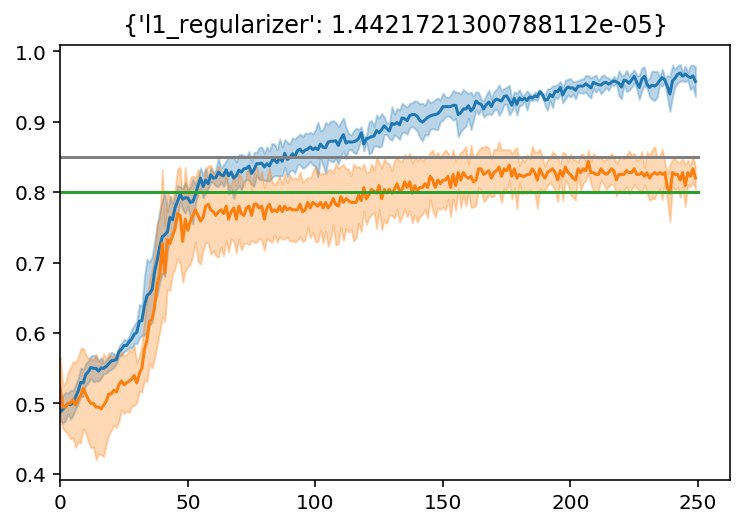

In [38]:
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_tmp.pkl'
df_tmp = pd.read_pickle(drive_path)
plot_mean_std(df_tmp.iloc[0])
df_tmp.best_model_paths[0]
plt.plot([0, 250], [0.8, 0.8])
plt.plot([0, 250], [0.85, 0.85], color='gray')
plt.xlim(0)


### Model 13

In [30]:
VERSION = '13'
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)
df_13 = pd.read_pickle(drive_path)

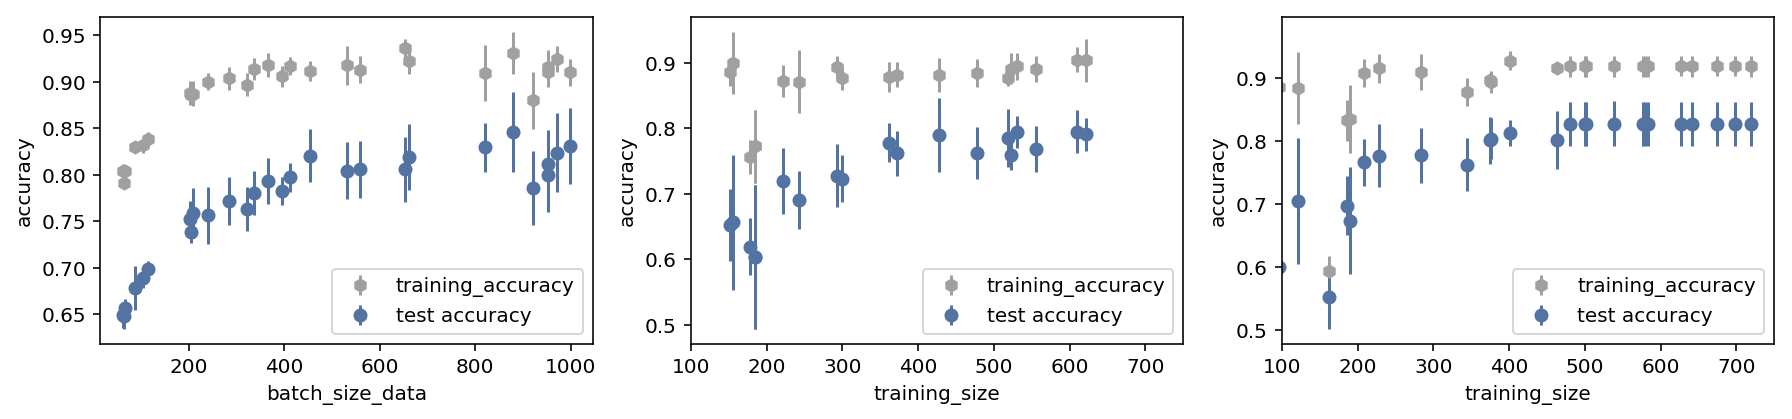

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

fig, ax = plot_scan_variable(df_13, 'batch_size_data', ax1)
fig, ax = plot_scan_variable(df_13[df_13.batch_size_data==500], 'training_size', ax2)
fig, ax = plot_scan_variable(df_13[df_13.batch_size_data==800], 'training_size', ax3)

ax2.set_xlim(100, 750)
ax3.set_xlim(100, 750)
ax2.legend(loc=4);

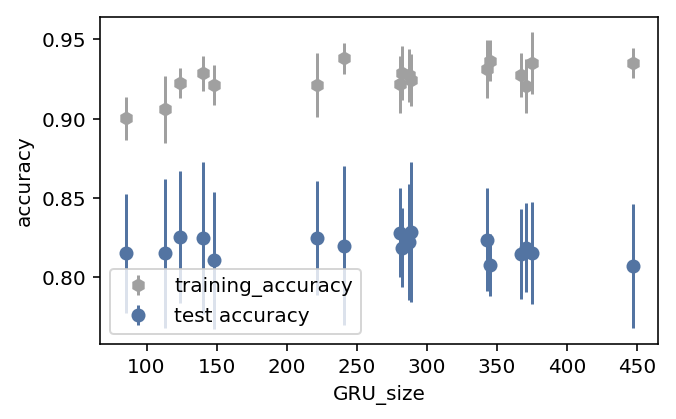

In [7]:
fig, ax = plot_scan_variable(df_13, 'GRU_size', start=200, stop=249)

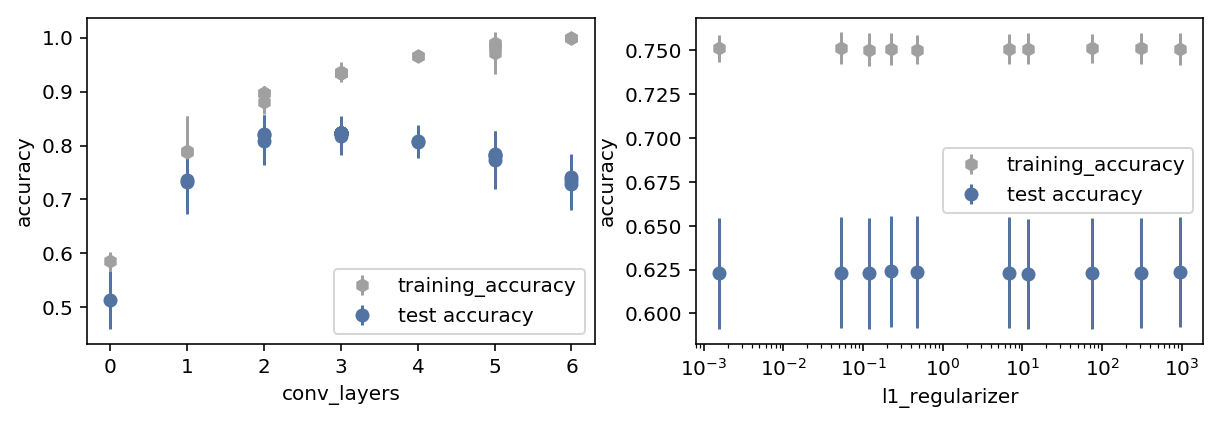

In [31]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,3))
fig, ax = plot_scan_variable(df_13, 'conv_layers', start=200, stop=249, ax=ax1)
fig, ax = plot_scan_variable(df_13, 'l1_regularizer', start=200, stop=249, ax=ax2)
ax2.set_xscale('log')

### Model 12

In [11]:
VERSION = '12'
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)
df_12 = pd.read_pickle(drive_path)
df_12 = df_12[df_12.best_model_accuracies.apply(lambda x:len(x))==5].reset_index()

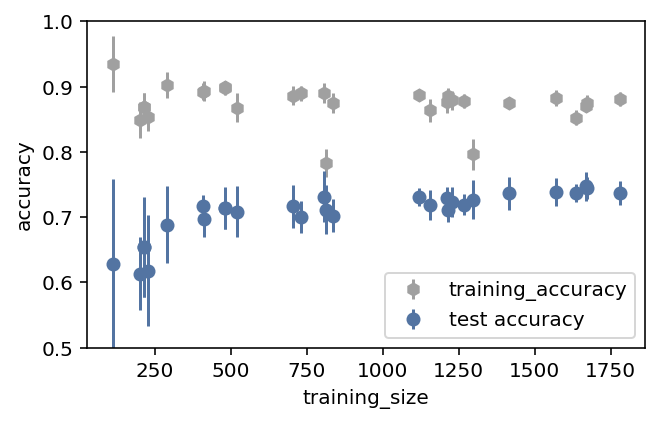

In [17]:
fig, ax = plot_scan_variable(df_12, 'training_size', start=200, stop=249)
ax.legend(loc=4)
ax.set_ylim(0.5, 1);
fig.savefig(f'./plots/training_size_mouse.png', bbox_inches='tight');

### Model 11

In [19]:
VERSION = '11'

drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)
df_11 = pd.read_pickle(drive_path)
df_11 = df_11[df_11.best_model_accuracies.apply(lambda x:len(x))==5].reset_index()

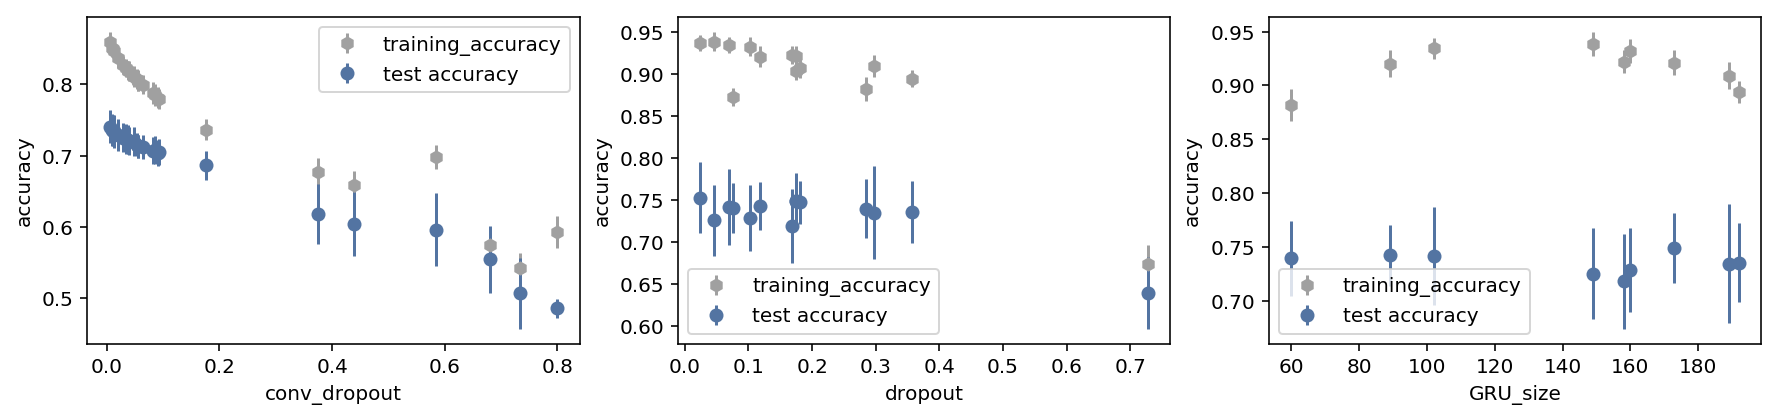

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
plot_scan_variable(df_11, 'conv_dropout', start=100, stop=150, ax=ax1)
plot_scan_variable(df_11, 'dropout', start=100, stop=150, ax=ax2)
plot_scan_variable(df_11, 'GRU_size', start=100, stop=150, ax=ax3);
# fig.savefig(f'./plots/model_11_overfit.png', bbox_inches='tight')

### Model 9

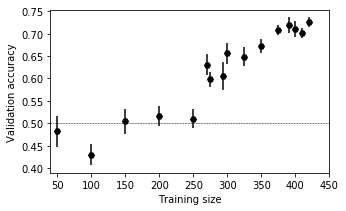

In [35]:
concat_path = './model_data/grid_mix2_{}.pkl'.format('08')
df = pd.read_pickle(concat_path)

fig, ax = plt.subplots(1, figsize=(5, 3))

for fo, ts in zip(df.fit_outs, df.training_size):
    somma = [x.history['val_acc'] for x in fo]
    s = np.mean(somma, 0)[130:180].mean()
    err = np.mean(somma, 0)[130:180].std()
    ax.errorbar(ts, s, err, fmt='H', color='black')
    
ax.hlines(0.5, 0, 550, linestyles='--', linewidth= 0.5)
ax.set_xlim(40, 450)
ax.set(xlabel='Training size', ylabel='Validation accuracy');

## Version 7

In [192]:
VERSION = '07'

local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)


local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
df.to_pickle(concat_path)

Local: 3, drive: 12


[Text(0, 0.5, 'dropout'), Text(0.5, 0, 'LSTM size')]

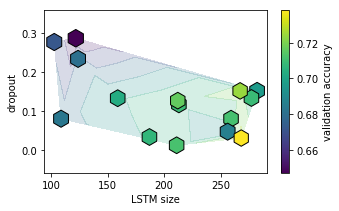

In [199]:
VERSION = '07'

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
combined_df = pd.read_pickle(concat_path)

xyz = np.ones([4, combined_df.shape[0]])

for index, (lstm_size, dropout, fits_outs) in combined_df[['LSTM_size', 'dropout', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[130:].mean()
    sigma = np.mean(somma, 0)[130:].std()

    xyz[0, index] = lstm_size
    xyz[1, index] = dropout
    xyz[2, index] = s
    xyz[3, index] = sigma

fig, ax = plt.subplots(1, figsize=(5, 3))
scatterplot = ax.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
ax.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot, label='validation accuracy')
ax.set(**{'xlabel':'LSTM size', 'ylabel':'dropout'})
# fig.savefig(f'./plots/LSTM_VS_dropout.png', bbox_inches='tight')

## ver 10

In [112]:
VERSION = '10'

#local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)

#local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

#print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

#concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
#df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
#df.to_pickle(concat_path)
df = colab_df

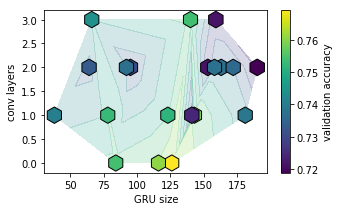

In [180]:
# df = df[df.best_model_accuracies.apply(lambda x:len(x))==5].reset_index()

xyz = np.ones([4, df.shape[0]])

for index, (gru_size, conv_layers, fits_outs) in df[['GRU_size', 'conv_layers', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[170:190].mean()
    sigma = np.mean(somma, 0)[170:190].std()

    xyz[0, index] = gru_size
    xyz[1, index] = conv_layers
    xyz[2, index] = s
    xyz[3, index] = sigma


fig, ax = plt.subplots(1, figsize=(5, 3))
scatterplot = plt.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
ax.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot, label='validation accuracy')
ax.set(**{'xlabel':'GRU size', 'ylabel':'conv layers'})

# fig.savefig(f'./plots/conv_layer_number_contourf.png', bbox_inches='tight')

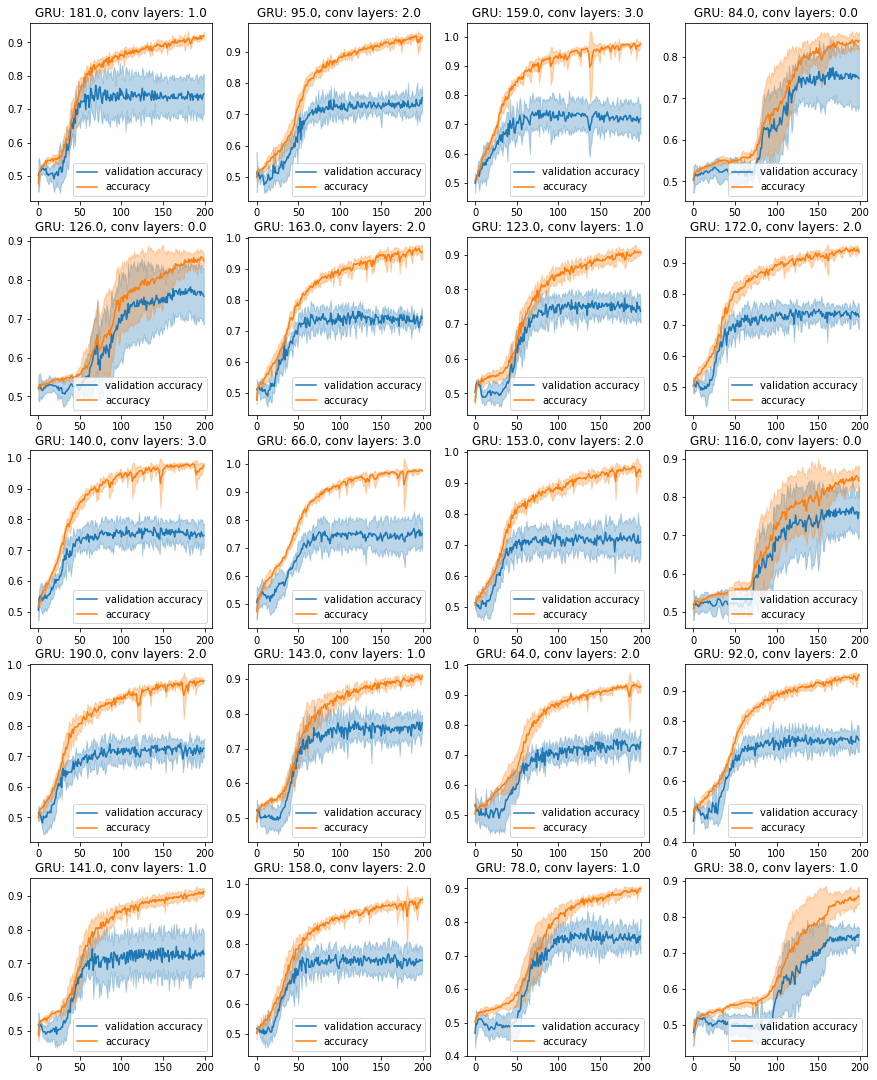

In [179]:
fig, ax = plt.subplots(int(np.ceil(df.shape[0]/4)),4, figsize=(15, 19))


for index, (gru_size, n_layers, fo) in df[['GRU_size', 'conv_layers', 'fit_outs']].iterrows():

    column = index%4
    row = int(index/4)


    somma = [x.history['val_acc'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='validation accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
    somma = [x.history['acc'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    ax[row, column].set_title(f'GRU: {gru_size}, conv layers: {n_layers}')
    ax[row, column].legend(loc=4)
    
# fig.savefig(f'./plots/gru_size_conv_layer.png', bbox_inches='tight')

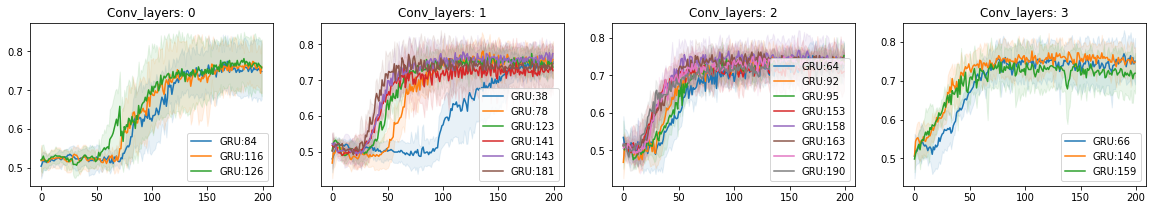

In [178]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
for i in range(4):
    for index, df_row in df.query('conv_layers==@i').sort_values(by='GRU_size').iterrows():
        somma = [x.history['val_acc'] for x in df_row.fit_outs]
        line, = ax[i].plot(np.mean(somma, 0), label=f'GRU:{int(df_row.GRU_size)}')
        ax[i].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                        color=line.get_color(), alpha=0.1)
        ax[i].set_title(f'Conv_layers: {i}')
        ax[i].legend(loc=4)
        
# fig.savefig(f'./plots/conv_layer_number.png', bbox_inches='tight')